Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

Load Data

In [2]:
df=pd.read_csv(r"C:\My python Files\AQI_Airpollution.csv")
df.head()

,Date,Country,Status,AQI Value
0,21-07-2022,Albania,Good,14
1,21-07-2022,Algeria,Moderate,65
2,21-07-2022,Andorra,Moderate,55
3,21-07-2022,Angola,Unhealthy for Sensitive Groups,113
4,21-07-2022,Argentina,Moderate,63


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18227 entries, 0 to 18226
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       18227 non-null  object
 1   Country    18227 non-null  object
 2   Status     18227 non-null  object
 3   AQI Value  18227 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 569.7+ KB


Clean Data

In [5]:
print(df[df['Date'].isna()])

Empty DataFrame
Columns: [Date, Country, Status, AQI Value]
Index: []


In [6]:
df['Date']=pd.to_datetime(df['Date'],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18227 entries, 0 to 18226
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       18227 non-null  datetime64[ns]
 1   Country    18227 non-null  object        
 2   Status     18227 non-null  object        
 3   AQI Value  18227 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 569.7+ KB


C:\Users\DELL\AppData\Local\Temp\ipykernel_8856\3864997176.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date']=pd.to_datetime(df['Date'],errors='coerce')


In [7]:
df.set_index("Date",inplace=True)
df.head()

,Country,Status,AQI Value
Date,,,
2022-07-21,Albania,Good,14
2022-07-21,Algeria,Moderate,65
2022-07-21,Andorra,Moderate,55
2022-07-21,Angola,Unhealthy for Sensitive Groups,113
2022-07-21,Argentina,Moderate,63


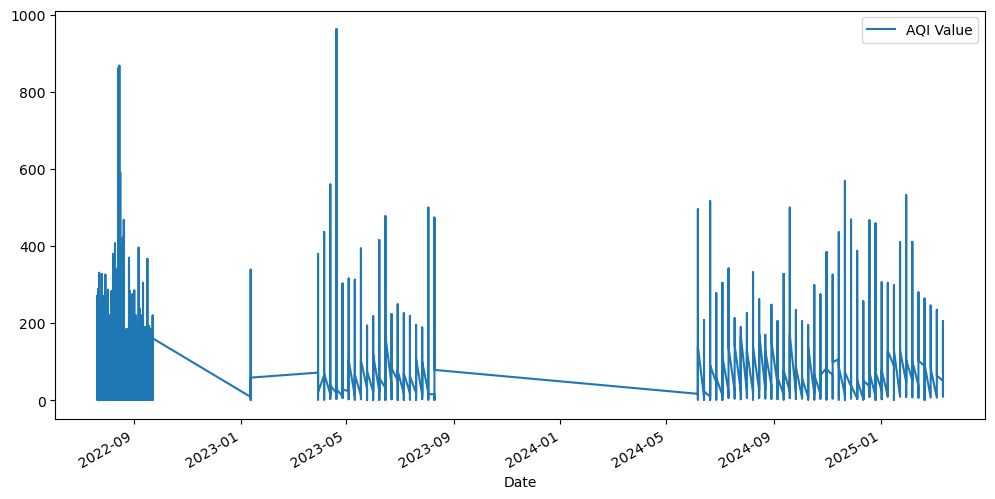

In [8]:
df.plot(figsize=(12,6),subplots=True)
plt.show()

1. The graph represents the AQI(Air quality index) values from mid of 2022 to 2025.
2. There are gaps in data where values drop to zero.
3. High AQI values are seen in mid-2022, early 2023, and mid-2024 with worsening air quality.
4. These spikes suggest poor air quality may be due to industrial activities

Stationarity

In [9]:
adfuller_result=adfuller(df['AQI Value'])

In [10]:
print(adfuller_result)
if adfuller_result[1] < 0.05:
    print("Stationary")
else:
    print("Non-Stationary")

(-15.215400453061477, 5.579625689083851e-28, 45, 18181, {'1%': -3.4307097284809336, '5%': -2.86169898646948, '10%': -2.566854624305701}, 193290.32233171744)
Stationary


Decomposing

In [12]:
decomposing=seasonal_decompose(df['AQI Value'],model='additive',period=365)

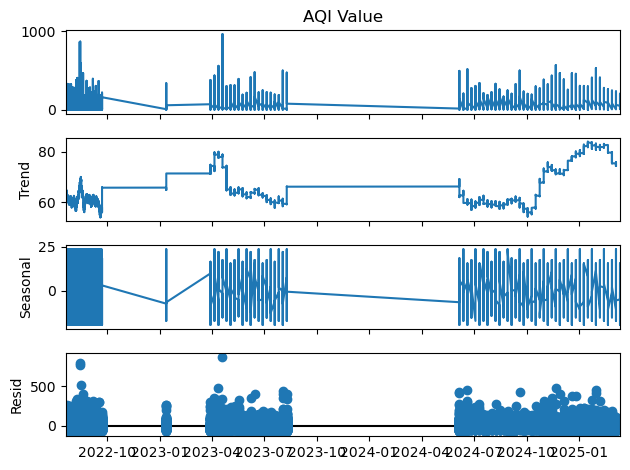

In [25]:
decomposing.plot()
plt.show()

1. Original Time Series:
  - In 2023-07 there is a high in AQI Value
  - IN 2023-10 to 2024-04 there is decrease in AQI Value
2. Trend:
  - The trend show variation in the AQI Value , there is a drastic increase in 2022-10 to 2023-01.
  - There is constant AQI value in 2023-10 to 2024-04.
  - The AQI value is increase at 2024-10 to 2025-01
3. Seasonal: 
  - The seasonal component is varying according to every year.
  - The air quality changes, possibly due to weather, festival crackers, or industrial gas release.
3.resid
  - There is less number of outliers in the data.
  - Large variations indicate unexpected spikes in pollution.

Split Data

In [15]:
len(df)

18227

In [16]:
print(len(df)*0.8)

14581.6


In [17]:
train=df.iloc[0:14581]
test=df.iloc[14581:]

Create ARIMA Model

In [ ]:
mymodel=ARIMA(train['AQI Value'],order=(1,1,1))

In [20]:
mymodel=mymodel.fit()

In [22]:
AQI_Value=mymodel.forecast(steps=len(test))
print(AQI_Value)

14581    59.775437
14582    60.125750
14583    60.134658
14584    60.134885
14585    60.134891
           ...    
18222    60.134891
18223    60.134891
18224    60.134891
18225    60.134891
18226    60.134891
Name: predicted_mean, Length: 3646, dtype: float64


C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [23]:
test['AQI_Value']=AQI_Value
test.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_8856\506810572.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['AQI_Value']=AQI_Value


,Country,Status,AQI Value,AQI_Value
Date,,,,
2024-08-22,Croatia,Moderate,53,NaN
2024-08-22,Cyprus,Moderate,55,NaN
2024-08-22,Czech Republic,Good,49,NaN
2024-08-22,Denmark,Good,14,NaN
2024-08-22,Dominican Republic,Good,23,NaN


Vistualization

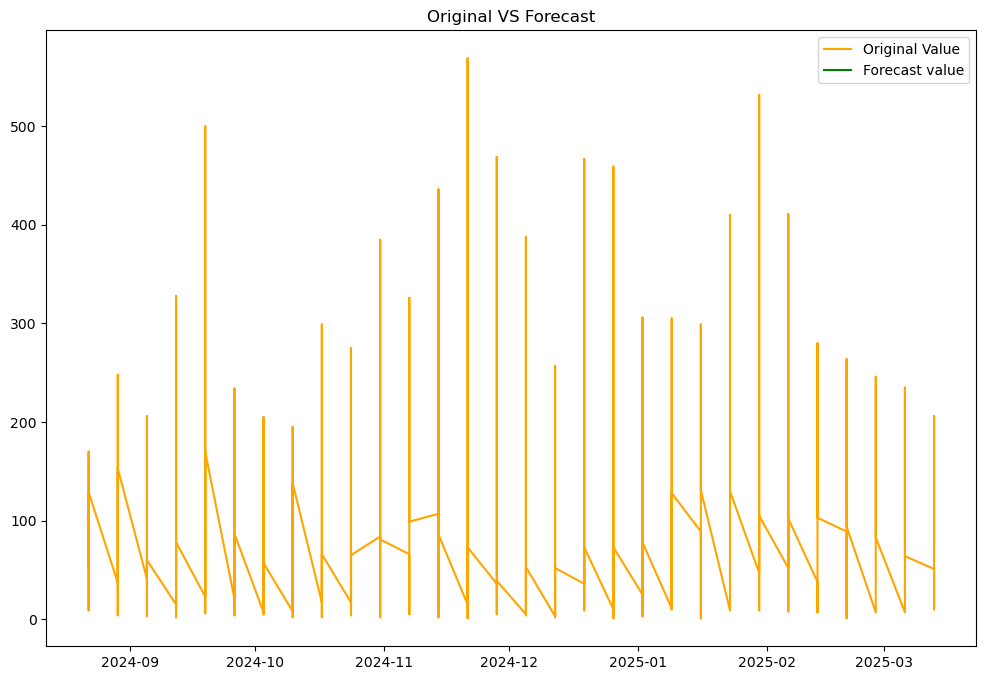

In [24]:
plt.figure(figsize=[12,8])
plt.plot(test.index,test['AQI Value'],color='orange',label='Original Value')
plt.plot(test.index,test['AQI_Value'],color='green',label='Forecast value')
plt.title("Original VS Forecast")
plt.legend()
plt.show()

- The peak value is at between 2024-11and 2024-12.
- There is lot of fluctuation in the given graph.